# Final Project: Speaker Series SEM

## Import Modules

**SEMOPY**

Semopy is a versatile and user-friendly library for Structural Equation Modeling (SEM) It provides an intuitive syntax for specifying complex SEM models, making it accessible for both beginners and experienced users.

In [1]:
pip install semopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import semopy as sem
import graphviz
from IPython.display import Image, display

from semopy import Model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from semopy import Optimizer
from semopy.inspector import inspect
from semopy.stats import calc_gfi, gather_statistics

## Understanding The dataset: HBAT

- HBAT employs thousands of workers in different operations around the world.
- Like many firms, one of its biggest management problems is attracting and keeping productive employees and the cost to replace and retrain employees is high. 

**QUESTION OF STUDY**:  HBAT management would like to understand the factors that contribute to employee retention. A better understanding can be gained by learning how to measure the key constructs that favour employee retention. Thus, HBAT is interested in developing and testing a measurement model made up of constructs that affect employees’ attitudes and behaviors about remaining with HBAT.

In [3]:
import pandas as pd
import pyreadstat
df = pd.read_spss("data/HBAT_SEM_NOMISSING.sav")

### Defining Individual Constructs
Based on published literature and some preliminary interviews with employees, a study was designed focusing on five key constructs. The consulting team and HBAT management also agreed on construct definitions based on how they have been used in the past. The five constructs along with a working definition are as follows:


● **Job Satisfaction (JS)**. Reactions resulting from an appraisal of one’s job situation.

● **Organizational Commitment** (OC). The extent to which an employee identifies and feels part of HBAT.

● **Staying Intentions (SI).** The extent to which an employee intends to continue working for HBAT and is not
participating in activities that make quitting more likely.

● **Environmental Perceptions (EP).** Beliefs an employee has about day-to-day, physical working conditions.

● **Attitudes Toward Coworkers (AC).** Attitudes an employee has toward the coworkers he/she interacts with on
a regular basis.

In order to gain insights to this constructs HBAT carried out a survey to 300 employees which resulted in different metrics which insighted about each specific construct. For example the job satisfaction scale contains multiple measures each assessing the degree of satisfaction felt by respondents with a different type of scale. 

In [4]:
df.head()

,id,JS1,OC1,OC2,EP1,OC3,OC4,EP2,EP3,AC1,...,C2,C3,AGE,EXP,JP,JS,OC,SI,EP,AC
0,1.0,5.0,3.0,5.0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,5.0,Not Happy,...,Part Time,USA,42.039135,6.00,Very High Performance,-0.224992,-0.363894,-0.369676,NaN,-1.294571
1,2.0,3.0,Strongly Disagree,5.0,Strongly Agree,3.0,7.0,Strongly Agree,Strongly Agree,Somewhat Happy,...,Full Time,USA,32.186862,5.75,Somewhat Higher performance,-0.554785,-1.660889,0.388158,0.867896,-1.256848
2,3.0,4.0,6.0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Not Happy,...,Full Time,USA,42.773742,1.00,Very High Performance,-0.515937,0.780682,1.281288,0.867896,-0.827400
3,4.0,4.0,7.0,7.0,Strongly Agree,Strongly Agree,7.0,Strongly Agree,9.0,Somewhat Happy,...,Part Time,USA,26.225984,3.00,Very High Performance,-0.131013,-0.329977,0.222363,0.659377,-1.256848
4,5.0,5.0,2.0,Strongly Agree,Strongly Agree,9.0,9.0,9.0,Strongly Agree,Not Happy,...,Full Time,USA,36.921312,14.00,Very High Performance,0.001167,0.321448,0.641472,0.435376,-1.086308


In [5]:
df.shape

(400, 33)


<img src="Screenshot%202023-11-15%20at%2013.14.23.png" width=600 height=600 align="center">

## Data Cleaning/ Handling

**Missing Values**

In [6]:
df.isna().sum()

id     0
JS1    0
OC1    0
OC2    0
EP1    0
OC3    0
OC4    0
EP2    0
EP3    0
AC1    0
EP4    0
JS2    0
JS3    0
AC2    0
SI1    0
JS4    0
SI2    0
JS5    0
AC3    0
SI3    0
AC4    0
SI4    0
C1     0
C2     0
C3     0
AGE    1
EXP    1
JP     1
JS     0
OC     0
SI     0
EP     1
AC     1
dtype: int64

In [7]:
df = df.dropna() # NO MORE MISSING VALUES

**Deal with non dummified variables**

In [8]:
df.dtypes

id      float64
JS1    category
OC1    category
OC2    category
EP1    category
OC3    category
OC4    category
EP2    category
EP3    category
AC1    category
EP4    category
JS2    category
JS3    category
AC2    category
SI1    category
JS4    category
SI2    category
JS5    category
AC3    category
SI3    category
AC4    category
SI4    category
C1     category
C2     category
C3     category
AGE     float64
EXP     float64
JP     category
JS      float64
OC      float64
SI      float64
EP      float64
AC      float64
dtype: object

In [9]:
categorical_columns = df.select_dtypes(include=['category']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:", unique_values)

Unique values for JS1: [3.0, 4.0, 5.0, 6.0, 2.0, 7.0, 1.0]
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
Unique values for OC1: ['Strongly Disagree', 6.0, 7.0, 2.0, 5.0, ..., 9.0, 1.0, 3.0, 8.0, 'Strongly Agree']
Length: 11
Categories (11, object): [1.0, 2.0, 3.0, 4.0, ..., 8.0, 9.0, 'Strongly Agree', 'Strongly Disagree']
Unique values for OC2: [5.0, 'Strongly Agree', 7.0, 8.0, 9.0, ..., 3.0, 2.0, 6.0, 4.0, 1.0]
Length: 11
Categories (11, object): [1.0, 2.0, 3.0, 4.0, ..., 8.0, 9.0, 'Strongly Agree', 'Strongly Disagree']
Unique values for EP1: ['Strongly Agree', 8.0, 9.0, 'Strongly Disagree', 7.0, 5.0, 3.0, 6.0, 2.0, 4.0]
Categories (10, object): [2.0, 3.0, 4.0, 5.0, ..., 8.0, 9.0, 'Strongly Agree', 'Strongly Disagree']
Unique values for OC3: [3.0, 'Strongly Agree', 9.0, 7.0, 6.0, ..., 4.0, 5.0, 1.0, 'Strongly Disagree', 2.0]
Length: 11
Categories (11, object): [1.0, 2.0, 3.0, 4.0, ..., 8.0, 9.0, 'Strongly Agree', 'Strongly Disagree']
Unique values for OC4: [7.0, 'Strong

/var/folders/br/09yt8syd075c91mf171jpwvw0000gp/T/ipykernel_24918/1215515238.py:5: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(f"Unique values for {column}:", unique_values)


## ENCODE DATA

In [10]:
import pandas as pd

categorical_columns = ['JS1','JS2', 'JS3', 'JS4', 'JS5', 'OC1', 'OC2', 'OC3', 'OC4', 'EP1', 'EP2', 'EP3', 'EP4', 'AC1', 'AC2', 'AC3', 'AC4', 'SI1','SI2','SI3','SI4']
encoded_df = df.copy()
for column in categorical_columns:
    encoded_df[f'{column}_encoded'] = df[column].cat.codes + 1 

In [11]:
columns_to_drop = ['JS1','JS2', 'JS3', 'JS4', 'JS5', 'OC1', 'OC2', 'OC3', 'OC4', 'EP1', 'EP2', 'EP3', 'EP4', 'AC1', 'AC2', 'AC3', 'AC4', 'SI1','SI2','SI3','SI4']
df = encoded_df
df = df.drop(columns=columns_to_drop)

categorical_columns = df.select_dtypes(include=['category']).columns

In [12]:
df.columns = df.columns.str.replace('_encoded', '')


In [13]:
columns = ['JS1','JS2', 'JS3', 'JS4', 'OC1', 'OC2', 'OC3', 'OC4', 'EP1', 'EP2', 'EP3', 'EP4', 'AC1', 'AC2', 'AC3', 'AC4', 'SI1','SI2','SI3','SI4']
df[columns].head()

,JS1,JS2,JS3,JS4,OC1,OC2,OC3,OC4,EP1,EP2,EP3,EP4,AC1,AC2,AC3,AC4,SI1,SI2,SI3,SI4
1,3,3,2,1,11,5,3,7,9,10,6,7,4,6,1,5,4,3,3,1
2,4,1,1,2,6,10,10,10,9,10,6,7,3,3,1,1,4,4,4,4
3,4,4,3,1,7,7,10,7,9,10,5,7,4,6,1,5,4,3,2,1
4,5,3,2,1,2,10,9,9,9,9,6,5,3,6,4,1,4,4,2,1
5,6,5,4,2,5,8,7,7,7,10,3,7,3,1,1,5,4,3,2,2


In [14]:
latentvariables = ['JS', 'OC', 'EP', 'AC', 'SI']
df[latentvariables].head()

,JS,OC,EP,AC,SI
1,-0.554785,-1.660889,0.867896,-1.256848,0.388158
2,-0.515937,0.780682,0.867896,-0.827400,1.281288
3,-0.131013,-0.329977,0.659377,-1.256848,0.222363
4,0.001167,0.321448,0.435376,-1.086308,0.641472
5,1.091082,-0.480619,0.048831,-1.294571,-0.085864


# SEM Methodology 

Using semopy normally involves three steps:

1. Define the model. 
2. Estimate the parameters of the model. 
3. Evaluate Fit 

## 1. Define the model
There are three parts:

1. Measurement equations (relation between the latent variables and their observable measures). 
2. Structural equations. The equations based on theory relating the observed variables with the latent variables as well as other exogenou variables. 
3. Additional covariances to be estimated.

In [15]:
df.columns

Index(['id', 'C1', 'C2', 'C3', 'AGE', 'EXP', 'JP', 'JS', 'OC', 'SI', 'EP',
       'AC', 'JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'OC1', 'OC2', 'OC3', 'OC4',
       'EP1', 'EP2', 'EP3', 'EP4', 'AC1', 'AC2', 'AC3', 'AC4', 'SI1', 'SI2',
       'SI3', 'SI4'],
      dtype='object')

 <img src="Screenshot%202023-11-15%20at%2013.25.45.png" width=600 height=600 align="center">


**Measurement Model:**

The measurement model describes the relationships between latent (unobserved) variables and their observed indicators. Latent variables are constructs that are not directly measured but are inferred from observed variables.

**Structural Model**

The structural model describes the relationships between latent variables. It specifies how the latent variables are related to each other.

**Exploring Examining Correlation Beteen latent variables**

In [16]:
selected_df = df[['JS', 'OC', 'SI', 'EP', 'AC']]
correlation_matrix = selected_df.corr()
print(correlation_matrix)

          JS        OC        SI        EP        AC
JS  1.000000  0.179911  0.198607  0.205980  0.042383
OC  0.179911  1.000000  0.485053  0.432612  0.265396
SI  0.198607  0.485053  1.000000  0.493300  0.275105
EP  0.205980  0.432612  0.493300  1.000000  0.221320
AC  0.042383  0.265396  0.275105  0.221320  1.000000


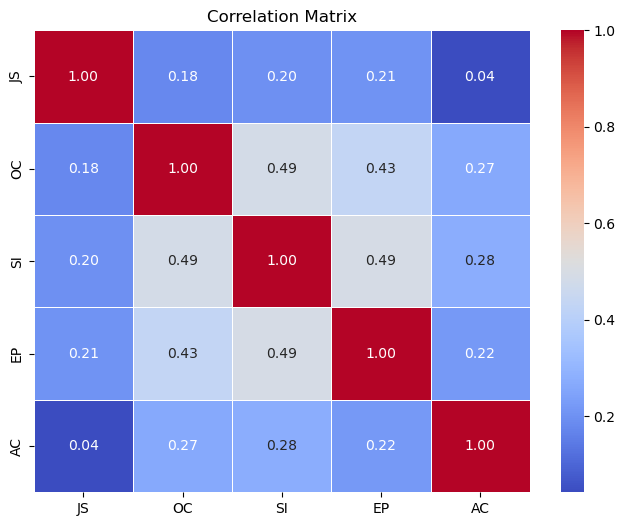

In [17]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [18]:
m1 = """
    #Measurement equations - more accurately, 
    #it defines which variables are latent and which variables are used to measure the latent variables. 
    
    #Job satisfaction
    JS~ JS1+ JS2 + JS3 + JS4 +JS5 
    
    #Organizational Commitement
    OC ~ OC1 + OC2 +OC3+ OC4
    
    #Environmental Perceptions
    EP ~ EP1 + EP2 + EP3 + EP4
    
    #Attitudes towards Cowokers
    AC ~ AC1 + AC2 + AC3 + AC4
    
    #Staying intentions
    SI ~ SI1 + SI2 + SI3 + SI4
    
    
    #Structural equations
    #The structural model describes the relationships between latent variables
    
    SI~ EP + OC
    OC ~ SI + EP
    AC ~OC + SI 
    EP ~ OC+ SI

    
    #Additional variances and covariances to be estimated in the the matrix. 
    
    OC~~SI
    EP~~SI
    OC~~EP
    SI~~AC
"""
semM1 = sem.Model(m1)

## 2. Estimate the model
Model defined above can be estimated by using the fit method. 


**obj :** str, optional Objective function to minimize. Possible values are 'MLW', 'FIML', 'ULS', 'GLS', 'WLS', 'DWLS'. The default is 'MLW'.

We will choose DWLS because:
The Diagonally Weighted Least Squares (DWLS) estimation method is a robust option in structural equation modeling (SEM)when dealing with ordinal or categorical data like it is our case.

In [19]:
resultDWLS = semM1.fit(df, obj= "DWLS")

In [20]:
print(resultDWLS)

Name of objective: DWLS
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.072
Number of iterations: 32
Params: 0.329 0.144 -0.004 0.059 0.003 -0.001 0.100 0.107 0.203 0.188 0.017 0.088 0.261 0.294 0.089 0.034 -0.050 -0.067 0.049 0.350 0.101 0.114 0.158 0.298 0.361 0.131 -0.206 0.130 0.164 -0.052 -0.016 0.357 0.034 0.041 -0.011 0.313 0.474 0.059


This gives us some basic information about the estimation process. Most importantly is the success completion of the optimization procedure. In order to see the main result, we can call the inspect method from the sem object as below:

In [21]:
print(semM1.inspect())

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    OC   ~  OC1 -0.001290  0.011565  -0.111569  9.111648e-01
1    OC   ~  OC2  0.099901  0.023681   4.218630  2.457917e-05
2    OC   ~  OC3  0.106910  0.022928   4.662755  3.120040e-06
3    OC   ~  OC4  0.203450  0.023178   8.777794  0.000000e+00
4    OC   ~   SI  0.187609  0.053660   3.496249  4.718482e-04
5    OC   ~   EP  0.016590  0.043599   0.380516  7.035622e-01
6    EP   ~  EP1  0.087860  0.008575  10.246438  0.000000e+00
7    EP   ~  EP2  0.261321  0.009318  28.045396  0.000000e+00
8    EP   ~  EP3  0.294248  0.012840  22.915885  0.000000e+00
9    EP   ~  EP4  0.089319  0.008041  11.107817  0.000000e+00
10   EP   ~   OC  0.034489  0.020334   1.696135  8.986033e-02
11   EP   ~   SI -0.049661  0.020147  -2.464941  1.370359e-02
12   SI   ~  SI1  0.298299  0.044784   6.660782  2.723755e-11
13   SI   ~  SI2  0.360667  0.046893   7.691279  1.465494e-14
14   SI   ~  SI3  0.131446  0.031201   4.212868  2.521480e-05
15   SI 

## Improving the model 

### 1) Testing For significance of Parameters
The Wald test is commonly used to test the hypothesis that a specific parameter is equal to a hypothesized value. The p-value associated with the Wald test helps determine the statistical significance of the estimated parameter. Only those with a p value lower than 0.05 are significant 

1. **Organizational Commitment (OC):**
   - OC1: Not significant (p = 0.911)
   - OC2: Highly significant (p = 2.46e-05)
   - OC3: Highly significant (p = 3.12e-06)
   - OC4: Highly significant (p = 0.0)
   
   (from structure equations)
   - SI: Highly significant (p = 0.000472)
   - EP: Not significant (p = 0.703)

2. **Environmental Perceptions (EP):**
   - EP1: Highly significant (p = 0.0)
   - EP2: Highly significant (p = 0.0)
   - EP3: Highly significant (p = 0.0)
   - EP4: Highly significant (p = 0.0)
   
   (from structure equations)
   - OC: Not ignificant (p = 0.0899)
   - SI: Significant (p = 0.0137)

3. **Staying Intentions (SI):**
   - SI1: Highly significant (p = 2.72e-11)
   - SI2: Highly significant (p = 1.47e-14)
   - SI3: Highly significant (p = 2.52e-05)
   - SI4: Highly significant (p = 0.0)
   
   (from structure equations)
   - EP: Significant (p = 0.000794)
   - OC: Significant (p = 0.00172)
   - JS: Not significant (p = 0.668)
   - AC: Not significant (p = 0.677)

4. **Attitudes towards Coworkers (AC):**
   - AC1: Significant (p = 0.0134)
   - AC2: Significant (p = 0.0234)
   - AC3: Highly significant (p = 0.0)
   - AC4: Highly significant (p = 4.66e-06)
   
     (from structure equations)
   - OC: Marginally significant (p = 0.0139)
   - SI: Significant (p = 0.00506)

5. **Job Satisfaction (JS):**
   - JS1: Highly significant (p = 0.0)
   - JS2: Highly significant (p = 0.0)
   - JS3: Not significant (p = 0.669)
   - JS4: Highly significant (p = 1.46e-08)
   - JS5: Highly significant (p = 0.0)

### 2) Seeing if covariance matrices are significant

1. **Covariances involving Latent Variables:**
   - OC ~~ SI: not significant (p = 0.0892)
   - OC ~~ EP: not significant (p = 0.107)
   - EP ~~ SI: Positive and significant (p = 0.000133)
   - EP ~~ EP: Positive and highly significant (p = 0.0)
   - SI ~~ AC: not significant (p = 0.677)


In [22]:
m2 = """
    #Measurement equations - more accurately, 
    #it defines which variables are latent and which variables are used to measure the latent variables. 
    
    #Job satisfaction
    JS~ JS1+ JS2 + JS4 +JS5 
    
    #Organizational Commitement
    OC ~ OC2 +OC3+ OC4
    
    #Environmental Perceptions
    EP ~ EP1 + EP2 + EP3 + EP4
    
    #Attitudes towards Cowokers
    AC ~ AC1 + AC2 + AC3 + AC4
    
    #Staying intentions
    SI ~ SI1 + SI2 + SI3 + SI4
    
    
    #Structural equations
    #The structural model describes the relationships between latent variables
    
    SI~ EP+ OC
    OC ~ SI
    AC ~ SI 
    EP ~  SI

    
    #Additional variances and covariances to be estimated in the the matrix. 
    
    EP ~~ SI
    EP ~~ EP
    SI ~~ AC
"""
semM2 = sem.Model(m2)

In [23]:
resultDWLS = semM2.fit(df, obj= "DWLS")

In [24]:
print(resultDWLS)

Name of objective: DWLS
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.072
Number of iterations: 27
Params: 0.329 0.143 0.058 0.003 0.101 0.113 0.211 0.184 0.086 0.254 0.313 0.092 -0.031 -0.067 0.037 0.354 0.103 0.266 0.243 0.392 0.124 -0.192 0.152 0.159 0.023 0.029 -0.058 0.312 0.455 0.060 0.312


In [25]:
print(semM2.inspect())

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    OC   ~  OC2  0.100680  0.022018   4.572521  4.818915e-06
1    OC   ~  OC3  0.112932  0.021385   5.281025  1.284634e-07
2    OC   ~  OC4  0.210598  0.021783   9.668049  0.000000e+00
3    OC   ~   SI  0.184408  0.037559   4.909892  9.112657e-07
4    EP   ~  EP1  0.085806  0.007325  11.714272  0.000000e+00
5    EP   ~  EP2  0.253739  0.007984  31.779430  0.000000e+00
6    EP   ~  EP3  0.312877  0.010936  28.608853  0.000000e+00
7    EP   ~  EP4  0.091869  0.006869  13.373666  0.000000e+00
8    EP   ~   SI -0.030941  0.015163  -2.040553  4.129526e-02
9    SI   ~  SI1  0.242731  0.044855   5.411428  6.252423e-08
10   SI   ~  SI2  0.392380  0.046918   8.363127  0.000000e+00
11   SI   ~  SI3  0.124040  0.031402   3.950126  7.810997e-05
12   SI   ~  SI4 -0.192376  0.024133  -7.971639  1.554312e-15
13   SI   ~   EP  0.151720  0.036175   4.193994  2.740849e-05
14   SI   ~   OC  0.158775  0.038258   4.150123  3.322973e-05
15   JS 

**Some Interpretation**

## 3.  Evaluate fit 


In [26]:
from scipy.stats import chi2

s = gather_statistics(semM2)
print("Degrees of Freedom (dof):", s.dof)
print("ML (Maximum Likelihood) Value:", s.ml)
print("Chi-square Value and Degrees of Freedom:", s.chi2)
chi2_value, dof = s.chi2
# Calculate the p-value
p_value = 1 - chi2.cdf(chi2_value, dof)
print("P-value For Chi-square test:", p_value)
print("Root Mean Square Error of Approximation (RMSEA):", s.rmsea)
print("Comparative Fit Index (CFI):", s.cfi)
print("Goodness of Fit Index (GFI):", s.gfi)
print("Adjusted Goodness of Fit Index (AGFI):", s.agfi)
print("Normed Fit Index (NFI):", s.nfi)
print("Tucker-Lewis Index (TLI):", s.tli)
print("Akaike Information Criterion (AIC):", s.aic)
print("Bayesian Information Criterion (BIC):", s.bic)



Degrees of Freedom (dof): 269
ML (Maximum Likelihood) Value: 0.07163375910087694
Chi-square Value and Degrees of Freedom: (28.51023612214902, 1.0)
P-value For Chi-square test: 9.32044312840219e-08
Root Mean Square Error of Approximation (RMSEA): 0
Comparative Fit Index (CFI): 1.0464701012497077
Goodness of Fit Index (GFI): 0.9947880343415064
Adjusted Goodness of Fit Index (AGFI): 0.9942842755789755
Normed Fit Index (NFI): 0.9947880343415065
Tucker-Lewis Index (TLI): 1.0509616351994937
Akaike Information Criterion (AIC): 59.23333773892234
Bayesian Information Criterion (BIC): 182.8133499027399


## Structural Equation Model Fit Indices Interpretation
1. **Degrees of Freedom (dof):** 269
   - *Interpretation:* The number of degrees of freedom in the model, indicating the number of parameters. 

2. **Maximum Likelihood (ML) Value:** 0.0716
   - *Interpretation:* The ML value is the maximum likelihood estimate of the population covariance matrix. A lower value suggests a better fit, but the absolute value may vary depending on the scale and nature of the data.

3. **Chi-square Value and Degrees of Freedom:** (28.51, 1.0)
   - *Interpretation:* The chi-square test assesses the fit of the model to the data. A smaller value relative to degrees of freedom (1.0) indicates a better fit. However, chi-square is sensitive to sample size. In this case, a chi-square value of 28.51 with 1 degree of freedom suggests a relatively good fit. Moreover, we can check that the P value of the test is significant.

4. **Root Mean Square Error of Approximation (RMSEA):** 0
   - *Interpretation:* RMSEA measures the discrepancy between the model-implied and observed covariance matrices. A value of 0 indicates a perfect fit. RMSEA values below 0.05 are generally considered good.

5. **Comparative Fit Index (CFI):** 1.0465
   - *Interpretation:* CFI compares the fit of the specified model to a null model. A value close to 1 indicates a good fit like the case of this model. Values slightly above 1 may be an anomaly or a result of specific conditions.

6. **Goodness of Fit Index (GFI):** 0.9948
   - *Interpretation:* GFI measures how well the model reproduces the observed covariance matrix. Values close to 1 suggest a very good fit. GFI values above 0.90 are generally considered good.

7. **Adjusted Goodness of Fit Index (AGFI):** 0.9943
   - *Interpretation:* AGFI is an adjustment to GFI considering the number of estimated parameters. A value close to 1 indicates a good fit. AGFI values above 0.90 are generally considered good.

8. **Normed Fit Index (NFI):** 0.9948
   - *Interpretation:* NFI is another index measuring the proportionate improvement in fit. A value close to 1 indicates a good fit. NFI values above 0.90 are generally considered good.

9. **Tucker-Lewis Index (TLI):** 1.051
   - *Interpretation:* TLI assesses the improvement of the fit of the model relative to a null model. A value close to 1 indicates a good fit. While TLI values close to 1 are generally considered indicative of a good fit, a value slightly above 1 may be unusual and may warrant further investigation.

10. **Akaike Information Criterion (AIC):** 59.23
    - *Interpretation:* AIC is a measure of model parsimony, balancing goodness of fit with the number of estimated parameters. Lower values are preferred. AIC is used for model comparison, and a smaller value suggests a better trade-off. An AIC of 59.23 indicates a relatively good trade-off between fit and complexity.

11. **Bayesian Information Criterion (BIC):** 182.81
    - *Interpretation:* BIC penalizes models for complexity. Lower values are preferred. Similar to AIC, BIC is used for model comparison. Note: It is inherently bigger than AIC because it applies a bigger penalty.


### Compare it to previous model we had initially before imporving it 

In [27]:
from scipy.stats import chi2

s = gather_statistics(semM1)
print("Degrees of Freedom (dof):", s.dof)
print("ML (Maximum Likelihood) Value:", s.ml)
print("Chi-square Value and Degrees of Freedom:", s.chi2)
chi2_value, dof = s.chi2
# Calculate the p-value
p_value = 1 - chi2.cdf(chi2_value, dof)
print("P-value For Chi-square test:", p_value)
print("Root Mean Square Error of Approximation (RMSEA):", s.rmsea)
print("Comparative Fit Index (CFI):", s.cfi)
print("Goodness of Fit Index (GFI):", s.gfi)
print("Adjusted Goodness of Fit Index (AGFI):", s.agfi)
print("Normed Fit Index (NFI):", s.nfi)
print("Tucker-Lewis Index (TLI):", s.tli)
print("Akaike Information Criterion (AIC):", s.aic)
print("Bayesian Information Criterion (BIC):", s.bic)


Degrees of Freedom (dof): 313
ML (Maximum Likelihood) Value: 0.0720659470928659
Chi-square Value and Degrees of Freedom: (28.682246942960628, 1.0)
P-value For Chi-square test: 8.528197048551789e-08
Root Mean Square Error of Approximation (RMSEA): 0
Comparative Fit Index (CFI): 1.0541988462364837
Goodness of Fit Index (GFI): 0.9948706838325084
Adjusted Goodness of Fit Index (AGFI): 0.9943298933100573
Normed Fit Index (NFI): 0.9948706838325084
Tucker-Lewis Index (TLI): 1.0599131015904901
Akaike Information Criterion (AIC): 73.97991573136716
Bayesian Information Criterion (BIC): 225.4650919321758


Very similar values but notice how AIC AND BIC are better in improved model. They are lower for model 2.